In [68]:
import pandas as pd
import glob

In [69]:
all_casualty_files = glob.glob('./npr_fatality_counts/*.csv')

In [87]:
all_pd = []

for file in all_casualty_files:
    all_pd.append(pd.read_csv(file))
    
combined = pd.concat(all_pd)
def get_date(article):
    link_elements = article["article_link"].split("/") 
    if '2023' in link_elements:
        year_index = link_elements.index('2023')
        date = "2023"+"-"+link_elements[year_index+1]+"-"+link_elements[year_index+2]
    elif '2024' in link_elements:
        year_index = link_elements.index('2024')
        date = "2024"+"-"+link_elements[year_index+1]+"-"+link_elements[year_index+2]
    else:
        date = "2024-01-11" # one differently formatted url https://www.npr.org/gaza-middle-east-al-aqsa-hospital-israel-palestinians-doctor
    return date

combined['article_date'] = combined.apply(get_date, axis=1)

combined.head(50)

https://www.npr.org/gaza-middle-east-al-aqsa-hospital-israel-palestinians-doctor
https://www.npr.org/gaza-middle-east-al-aqsa-hospital-israel-palestinians-doctor
https://www.npr.org/gaza-middle-east-al-aqsa-hospital-israel-palestinians-doctor


,article_id,article_link,sentence,category,voice,article_date
0,259,https://www.npr.org/sections/goatsandsoda/2023...,"""I was crying, and I'm still crying, f...",both,ACTIVE,2023-11-05
1,259,https://www.npr.org/sections/goatsandsoda/2023...,"""He died actually without seeing his mo...",palestine,ACTIVE,2023-11-05
2,259,https://www.npr.org/sections/goatsandsoda/2023...,"Then, the secretary of the kibbutz bega...",israel,ACTIVE,2023-11-05
3,259,https://www.npr.org/sections/goatsandsoda/2023...,And I couldn't keep out of mind this ...,palestine,PASSIVE,2023-11-05
4,259,https://www.npr.org/sections/goatsandsoda/2023...,"With every image, with every video, with...",palestine,PASSIVE,2023-11-05
0,271,https://www.npr.org/2023/11/02/1210088881/a-ta...,After NPR's last interview with Nathan ...,palestine,PASSIVE,2023-11-02
1,271,https://www.npr.org/2023/11/02/1210088881/a-ta...,They were killed by an Israeli airstrik...,palestine,PASSIVE,2023-11-02
0,37,https://www.npr.org/sections/goatsandsoda/2024...,"Then came the war: On Oct. 7, Hamas a...",israel,ACTIVE,2024-02-02
1,37,https://www.npr.org/sections/goatsandsoda/2024...,Israel's subsequent military campaign in ...,palestine,ACTIVE,2024-02-02
2,37,https://www.npr.org/sections/goatsandsoda/2024...,"""In late October, an Israeli airstrike ...",palestine,ACTIVE,2024-02-02


In [76]:
combined.drop_duplicates(['article_link', 'sentence'], keep = 'first', inplace=True)


In [77]:
summary = combined.groupby(['article_date', 'category']).agg({'article_id':'count'}).reset_index().pivot(index='article_date', columns='category', values='article_id').reset_index()

In [80]:
for column in ['both', 'israel', 'palestine']:
    if column not in summary:
        summary[column] = 0

summary['both'].fillna(0, inplace=True)
summary['israel'] = summary['israel'] + summary['both']
summary['palestine'] = summary['palestine'] + summary['both']

In [81]:
summary.head()

category,article_date,both,israel,pa,palestine
0,2023-10-07,1.0,4.0,NaN,3.0
1,2023-10-08,0.0,3.0,NaN,2.0
2,2023-10-09,1.0,15.0,NaN,8.0
3,2023-10-10,0.0,5.0,NaN,NaN
4,2023-10-11,1.0,11.0,NaN,9.0


In [ ]:
summary.israel.sum(), summary.palestine.sum()

(209.0, 353.0)

In [84]:
summary['article_date'] = pd.to_datetime(summary['article_date'])

In [90]:
summary_grouped = summary.groupby(pd.Grouper(key='article_date', freq='7D')).agg({'israel':'sum', 'palestine':'sum'}).reset_index()

summary_grouped

category,article_date,israel,palestine
0,2023-10-07,66.0,52.0
1,2023-10-14,45.0,74.0
2,2023-10-21,42.0,66.0
3,2023-10-28,22.0,56.0
4,2023-11-04,25.0,46.0
5,2023-11-11,28.0,69.0
6,2023-11-18,10.0,23.0
7,2023-11-25,32.0,20.0
8,2023-12-02,30.0,52.0
9,2023-12-09,21.0,8.0


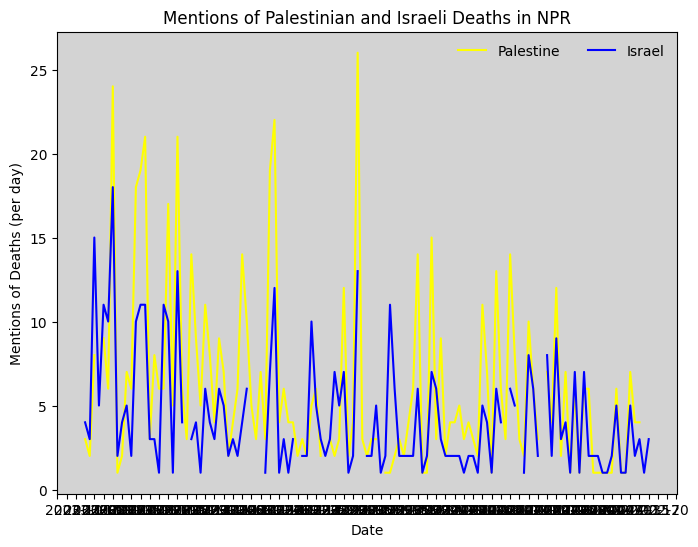

In [89]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(8, 6))

summary_plot = summary.copy()

dates = summary_plot['article_date'].astype(str).values
 
ax.plot(dates, summary_plot.palestine, label = 'Palestine', color = 'yellow')
ax.plot(dates, summary_plot.israel, label = 'Israel', color = 'blue')

ax.set_title("Mentions of Palestinian and Israeli Deaths in BBC")
ax.set_xlabel("Date")
ax.set_ylabel("Mentions of Deaths (per day)")

ax.set_facecolor("lightgray")

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.legend(ncols=2, framealpha=0)
#ax.set_ybound([0,250])